In [ ]:
# https://www.youtube.com/watch?v=hUqeGLkx_zs 

# S: set of states 
# A: set of actions 
# P: transition function 
# R: reward function

# Iteration K
# s_k in S 
# a_k in A
# R(s_k, a_k): reward for taking action a_k in state s_k 
# P(s_{k+1} | s_k, a_k): probability of moving to s_{k+1} from s_k when action a_k is taken 

# Aim: maximize total rewards

In [ ]:
N = 100
p = 0.4

In [ ]:
S = [*range(0, N+1)]    # 현재 내가 가지고 있는 돈 
A = [*range(0, N+1)]    # 내가 게임에 거는 돈. 

In [ ]:
print(S)
print(A)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
def P(s_next, s, a):
    # 돈을 얻었을 때. 도박에 성공했을 때
    if s + a == s_next and a <= min(s, N-s) and a >= 1 and 0 < s < N :
        return p
    
    # 돈을 잃었을 때. 도박에 실패했을 때
    elif s - a == s_next and a <= min(s, N-s) and a >= 1 and 0 < s < N :
        return 1 - p

    # 아무것도 아닐 때
    else:
        return 0

In [ ]:
def R(s, a):
    if s == N:  # 게임에서 이겼다 
        return 1
    else:
        return 0

In [ ]:
def value_iteration(S, A, P, R):
    """
    :param list S: set of states 
    :param list A: set of actions
    :param function P: transition function
    :param function R: reward function
    """

    V = {s: 0 for s in S}                                                       # 현재의 상태를 평가 
    optimal_policy = {s: 0 for s in S}                                          # 지금 할 수 있는 가장 좋은 베팅(=action)을 구한다.

    while True:
        oldV = V.copy()

        for s in S:
            Q = {}
            for a in A:
                Q[a] = R(s, a) + sum(P(s_next, s, a) * oldV[s_next] for s_next in S)

            V[s] = max(Q.values())                                              # V(s) = max_a Q(s, a). 

            optimal_policy[s] = max(Q, key=Q.get)                               # max(Q, key=Q.get): Q의 value들을 모두 본 다음에 value가 가장 큰 key값을 찾고 그것을 반환해 준다. 
                                                                                # 가장 큰 value를 가진 배팅 금액(key)을 optimal_policy[s]에 넣어준다. 

        if all(oldV[s] == V[s] for s in S):
            break

    return V, optimal_policy

In [ ]:
# Run algorithm

V, optimal_policy = value_iteration(S, A, P, R)

In [ ]:
print(V)
print(optimal_policy)

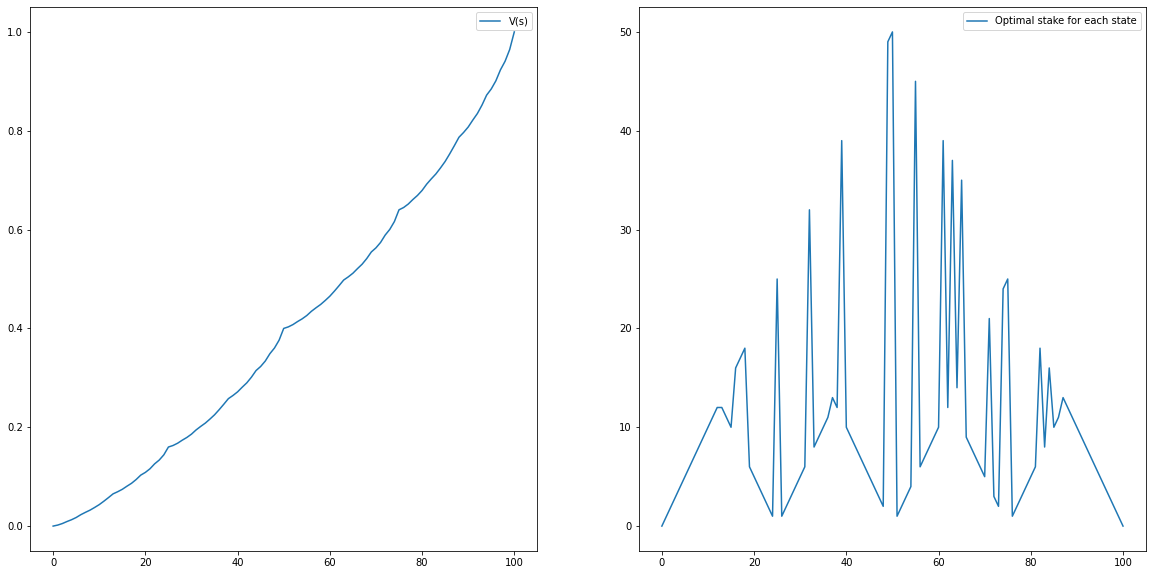

In [ ]:
# Visualize V and optimal policy

import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(S, list(V.values()), label='V(s)')
ax2.plot(S, list(optimal_policy.values()), label='Optimal stake for each state')

ax1.legend()
ax2.legend()
plt.show()